In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
df.shape

(32561, 15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [38]:
#Replace '?' with NaN
df.replace(' ?', np.nan, inplace=True)

In [39]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [40]:
#Strip whitespace in all object columns (so " Private" -> "Private")
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

In [41]:
#How many missing incolumns
df[['workclass','occupation','native_country']].isnull().sum()

workclass         1836
occupation        1843
native_country     583
dtype: int64

In [42]:
#Fill with mode (keeps all rows)
for c in ['workclass','occupation','native_country']:
    if df[c].isnull().sum() > 0:
        df[c].fillna(df[c].mode()[0], inplace=True)

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_25328\3147723984.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0], inplace=True)


In [43]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [44]:
#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Select numeric columns
num_cols=df.select_dtypes(include=['int64','float64']).columns

#Standard Scaling
scaler=StandardScaler()
df_std=df.copy()
df_std[num_cols]=scaler.fit_transform(df[num_cols])

In [45]:
#Min-Max Scaling
scaler_mm=MinMaxScaler()
df_mm=df.copy()
df_mm[num_cols]=scaler_mm.fit_transform(df[num_cols])

In [46]:
print("Standard Scaled sample:",df_std[num_cols].head())
print("\nMin-Max Scaled sample:",df_mm[num_cols].head())

Standard Scaled sample:         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  

Min-Max Scaled sample:         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_w

* Standard Scaling: good when data is normal (mean=0, std=1). Used in SVM, Logistic Regression, PCA.
* Min-Max Scaling: compresses values to [0,1]. Used in Neural Networks, KNN, KMeans.

In [47]:
#Encoding Techniques
from sklearn.preprocessing import LabelEncoder
cat_cols=df.select_dtypes(include=['object']).columns
df_enc=df.copy()

for col in cat_cols:
    if df[col].nunique()<=5:
        # One-Hot Encoding
        df_enc=pd.get_dummies(df_enc,columns=[col],prefix=col)
    else:
        # Label Encoding
        le=LabelEncoder()
        df_enc[col]=le.fit_transform(df_enc[col].astype(str))

print(df_enc.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  ...  native_country  \
0           0             1          2174             0  ...              38   
1           3             0             0             0  ...              38   
2           5             1             0             0  ...              38   
3           5             0             0             0  ...              38   
4           9             5             0             0  ...               4   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0            

* One-Hot Encoding: no order assumed, good for few categories, but increases columns.
* Label Encoding: efficient for many categories, but imposes artificial order.

In [48]:
#Feature Engineering
#New Feature 1: Age Group (divide ages into categories)
df['age_group']=pd.cut(df['age'],bins=[0, 25, 45, 65, 100],labels=['Youth', 'Adult', 'Mid_age', 'Senior'])

#New Feature 2: Work Hours Category (classify hours per week)
df['work_hours_cat']=pd.cut(df['hours_per_week'],bins=[0, 20, 40, 60, 100],labels=['Part_time', 'Full_time', 'Overtime', 'Extreme'])

#Transformation: Log of capital_gain (to reduce skewness)
df['capital_gain_log']=np.log1p(df['capital_gain'])

print(df[['age','age_group','hours_per_week','work_hours_cat','capital_gain','capital_gain_log']].head())

   age age_group  hours_per_week work_hours_cat  capital_gain  \
0   39     Adult              40      Full_time          2174   
1   50   Mid_age              13      Part_time             0   
2   38     Adult              40      Full_time             0   
3   53   Mid_age              40      Full_time             0   
4   28     Adult              40      Full_time             0   

   capital_gain_log  
0          7.684784  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000  


* Age group helps cluster ages into meaningful categories.
* Work hours groups people into different work types.
* Log transform reduces skewness in capital-gain.

In [49]:
#Feature Selection
from sklearn.ensemble import IsolationForest

#Select only numeric columns for outlier detection
num_data=df.select_dtypes(include=['int64','float64'])

#Build isolation forest model
iso=IsolationForest(contamination=0.02, random_state=42)

##### Discussion: Impact of Outliers on Model Performance


Outliers are data points that are very different from the rest of the observations. They can have a big impact on how models learn patterns.  

- In regression, even a few extreme values can pull the regression line toward them, which reduces accuracy.  
- In distance-based models like KNN or clustering, outliers stretch the distance space and may be treated as neighbors even though they don’t represent the majority of the data.  
- In tree-based models, outliers may lead to unnecessary splits, which makes the model more complex and can cause overfitting.  
- They also affect preprocessing: things like mean, variance, scaling, and normalization all get skewed when outliers are present.  

--- 

For the **Adult Income dataset**, this problem is quite relevant. For example:  
- Features like **capital-gain** and **capital-loss** contain very extreme values, where most people have 0 but a few records have unusually high amounts.  
- **Hours-per-week** also has rare cases with extreme working hours that don’t reflect most of the population.  
* If we keep these outliers, models might give them more importance than they deserve.  

* To handle this, I applied **Isolation Forest** and removed about ~2% of the data as outliers.  
* By removing these extreme cases, the dataset becomes cleaner.
* This helps models like KNN (which is distance-based) and regression models to perform more reliably, without being biased by just a few unusual records.


In [50]:
#Fit model and predict (-1 means outlier, 1 means normal)
outlier_pred=iso.fit_predict(num_data)

#Keep only normal data (outlier_pred = 1)
df_clean=df[outlier_pred==1]

print("Original shape:",df.shape)
print("After removing outliers:",df_clean.shape)

Original shape: (32561, 18)
After removing outliers: (31909, 18)


**Note:** The assignment originally suggested using the Predictive Power Score (PPS) to analyze relationships between features.  
* Since the **ppscore library** is not available in this environment, and i'm facing compatibility issues between ppscore which is avilable in pandas version 1.5.3 and the latest pandas version is 2.3.2, I used **Mutual Information (MI)** from `scikit-learn` as an alternative.  
* MI serves the same purpose by capturing both linear and non-linear dependencies between variables (numeric and categorical), making it a perfect replacement for PPS in this analysis.

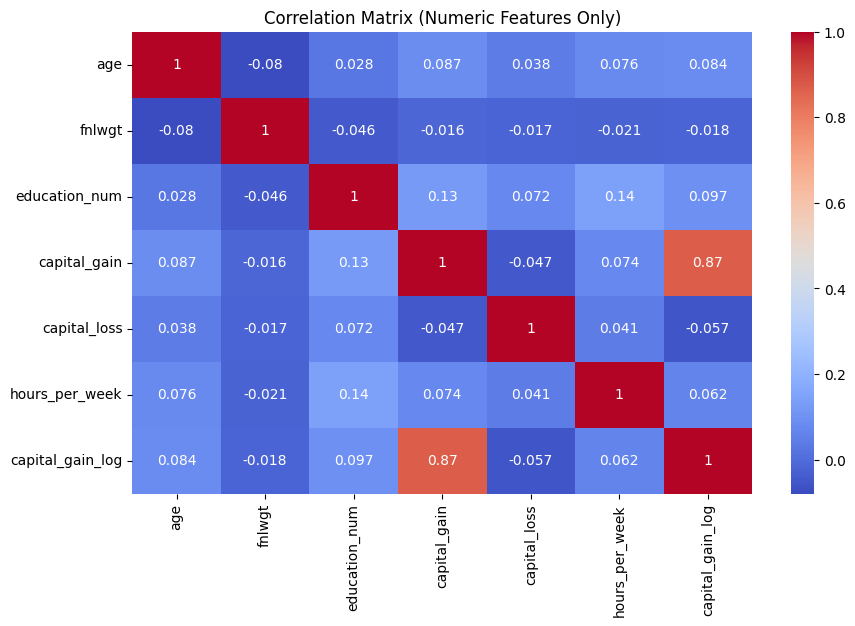

In [51]:
# Correlation Matrix
corr = df_clean.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [52]:
#Mutual Information(PPS Alternative)

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Target variable
target = 'income'

# Encode target
y = LabelEncoder().fit_transform(df_clean[target])

# Features
X = df_clean.drop(columns=[target]).copy()

In [53]:
# Encode ALL categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


In [54]:
# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

In [55]:
print("Top Features by Mutual Information(similar to PPS):")
print(mi_scores.head(10))

Top Features by Mutual Information(similar to PPS):
relationship        0.113706
marital_status      0.107063
age                 0.068646
capital_gain_log    0.064529
capital_gain        0.063407
education_num       0.060910
education           0.057687
occupation          0.053104
age_group           0.049978
hours_per_week      0.041477
dtype: float64


### Discussion: Correlation vs. Mutual Information (MI)

Correlation and Mutual Information (MI) both help us understand how features are related to the target variable, but they don’t always tell the same story.

- **Correlation** only measures linear numeric relationships. 
* For example, if age increases and income also increases in a straight line, correlation will show a strong relationship. 
* But if the pattern is curved or step-like, correlation will underestimate it. 
* Also, correlation cannot directly handle categorical variables, so it ignores many useful relationships in this dataset.  

- **Mutual Information (MI)** is more powerful because it can capture any kind of dependency (both linear and non-linear), and it also works with categorical features once they are encoded into numbers. 
* This makes MI more suitable for the Adult Income dataset, since it has both numeric features (like age, hours-per-week, capital-gain) and categorical ones (like education, occupation, marital-status).  

##### Key Insights from Comparing Both:
- Features such as **education**, **occupation**, and **marital-status** barely showed up in the correlation matrix.
* However, MI ranked them much higher in terms of predictive power. 
* This makes sense because these are categorical attributes that have a big influence on whether a person earns more than 50K, but correlation simply can’t detect that.  

- **Hours-per-week** had a weak correlation with income, but MI revealed it as a meaningful predictor. 
* People who work very low hours usually earn less, while people who work overtime or extreme hours tend to earn more, which is not a straight-line trend. 
* That’s why MI picked it up but correlation didn’t.  
- Numeric outliers like **capital-gain** also behave interestingly: correlation shows some relationship with income, but MI emphasizes it more strongly, because the effect is not uniform—it’s mostly zero for many people, but for a small group it heavily impacts income.  

#### Overall Comparison:
- Correlation is a quick and simple way to check for straight-line relationships between numeric variables, but it gives a limited view.   
- MI goes deeper and uncovers both linear and non-linear influences, and it brings out the importance of categorical features that correlation ignores.  
- For this dataset, relying only on correlation would make us underestimate the importance of key predictors like education, occupation, and marital-status, while MI highlights their true predictive value.   
- This shows why MI (or PPS in general) is a better choice for feature importance in mixed datasets like Adult Income.
- This comparison shows that MI (used here as a PPS alternative) reveals important relationships, such as the impact of education and marital-status on income, which are not evident in the correlation matrix. Hence, MI provides additional insights beyond correlation.”
